#we will be using GTZAN dataset
it has 1000 audio tracks, each 30 seconds long, 10 genres



dataset has following data
 genres oroginal
 images original -> visual representation for each audio file bcs NN takes in 
 2 CSV file -> contaiinig features

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
df= pd.read_csv("Data/features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [6]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [7]:
df.shape

(9990, 60)

In [8]:
#dropping first columns
df= df.drop("filename", axis=1)

In [9]:
df

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [18]:
#understanding audio files
audio_recording= "Data/genres_original/country/country.00015.wav"
data,sr= librosa.load(audio_recording)
print(type(data), type(str))

<class 'numpy.ndarray'> <class 'type'>


In [19]:
librosa.load(audio_recording, sr= 45600)

(array([-0.01269922, -0.01687912, -0.00230074, ...,  0.2952507 ,
         0.24954839,  0.12669401], dtype=float32),
 45600)

it is loading and decoding the audio as time series
sr= sampling rate

librosa for music and audio analysis


In [20]:
import IPython
IPython.display.Audio(data, rate = sr)

IPython to play audio in notebook'


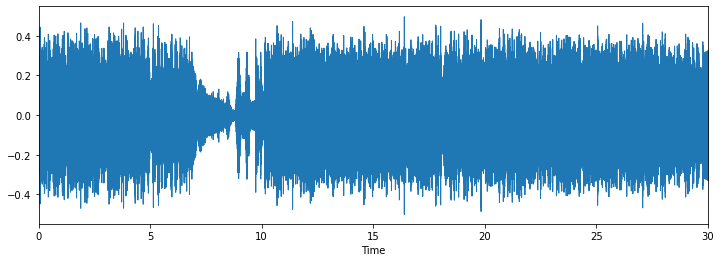

In [21]:
#visualizing audio waves
plt.figure(figsize=(12,4))
librosa.display.waveplot(data)
plt.show()

#spectrograms visual way of representing single loudness of a signal over time at various frequencies at various waveforms, also called sonograms, voiceprints, voicegrams

C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\librosa\display.py:954: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


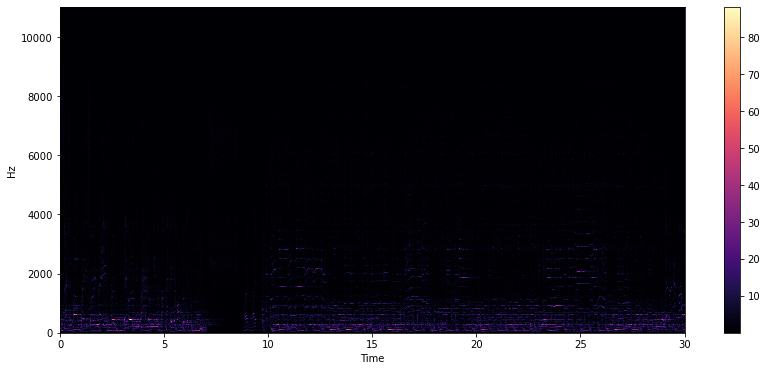

In [22]:
stft= librosa.stft(data)
stft_db= librosa.amplitude_to_db(abs(stft))
plt.figure(figsize= (14,6))
librosa.display.specshow(stft, sr= sr, x_axis ='time', y_axis = 'hz')
plt.colorbar()


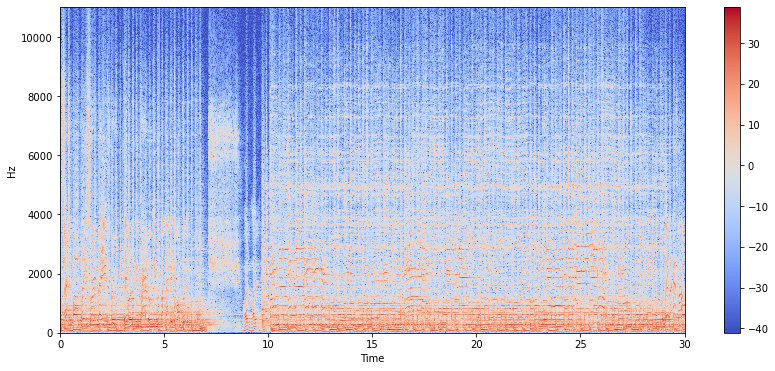

In [23]:
stft= librosa.stft(data)
stft_db= librosa.amplitude_to_db(abs(stft))
plt.figure(figsize= (14,6))
librosa.display.specshow(stft_db, sr= sr, x_axis ='time', y_axis = 'hz')
plt.colorbar()


In [24]:
#sprectra rolloff  -> frequency below specified percentage of spectral energy


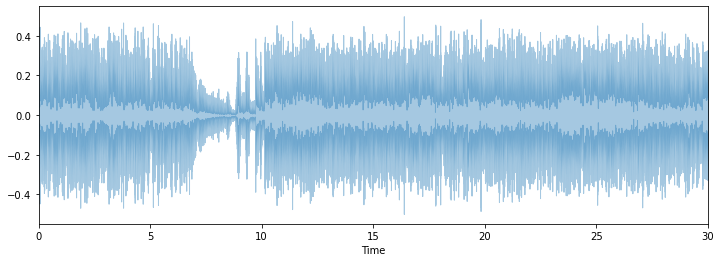

In [28]:
from sklearn.preprocessing import normalize
spectral_rolloff= librosa.feature.spectral_rolloff(data+0.01, sr= sr)[0]
plt.figure(figsize= (12,4))
librosa.display.waveplot(data, sr= sr, alpha = 0.4, )

chroma feature -> whose pitches can be meaningfully categorised and whose tuning approximates to the equal temperes scale. 
they capture haromic and melodic characterstics of music while being robust to changes in timbre and instrumentation

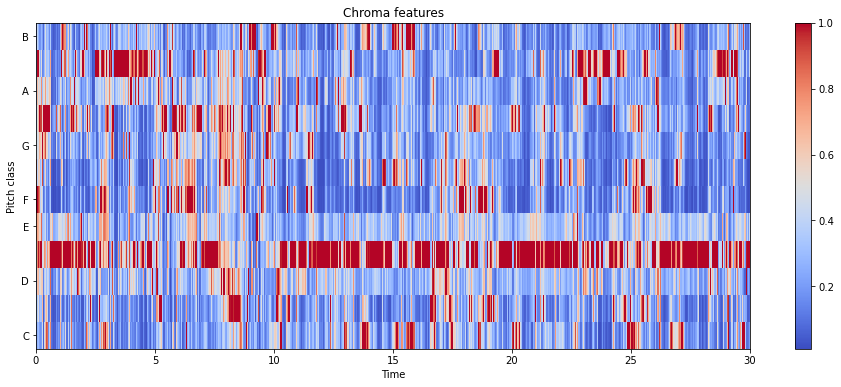

In [29]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data, sr= sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr= sr, x_axis = 'time', y_axis = 'chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma features")
plt.show()

zero crossing rate occus if successive samples have different algebraic signs-> it is measured in frequency content of a signal

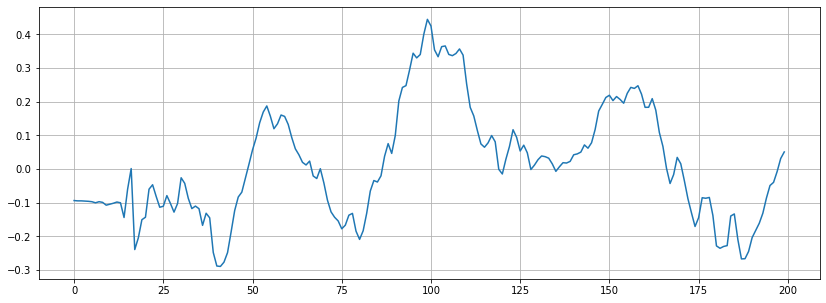

In [30]:
start= 1000
end = 1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end])
plt.grid()

In [33]:
#with the help of library we can get count of zero crossings
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print(sum(zero_cross_rate))

17


In [35]:
#feature extraction
class_list = df.iloc[:,-1]
convertor =LabelEncoder()

In [36]:
y= convertor.fit_transform(class_list)

In [37]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [38]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [40]:
#now scaling the features
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X= fit.fit_transform(np.array(df.iloc[:,:-1], dtype = float))

In [42]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.3)

In [48]:
def train_model(model,epochs,optimizer):
    batch_size= 128
    model.compile(optimizer =optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics= 'accuracy')
    return model.fit(X_train,y_train, validation_data =(X_test,y_test), epochs = epochs,
                    batch_size= batch_size)

In [49]:
def plotValidate(history):
    print("Validation Accuracy", max(hisotry.history['val_accuracy']))
    pd.DaraFrame(history.history).plot(figsize= (12,6))
    plt.show()

In [54]:
model =keras.Sequential([
    keras.layers.Dense(512,activation='relu', input_shape =(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10,activation='softmax'),
    

    
])
print(model.summary())
model_history= train_model(model=model, epochs = 1100, optimizer='adam')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               30208     
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)               

55/55 [==============================] - 0s 4ms/step - loss: 0.0727 - accuracy: 0.9775 - val_loss: 0.3142 - val_accuracy: 0.9236
Epoch 48/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.9791 - val_loss: 0.3272 - val_accuracy: 0.9139
Epoch 49/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0650 - accuracy: 0.9801 - val_loss: 0.3270 - val_accuracy: 0.9179
Epoch 50/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9813 - val_loss: 0.3400 - val_accuracy: 0.9166
Epoch 51/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9800 - val_loss: 0.3335 - val_accuracy: 0.9166
Epoch 52/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9823 - val_loss: 0.3434 - val_accuracy: 0.9112
Epoch 53/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9820 - val_loss: 0.3749 - val_accuracy: 0.9092
Epoch 54/1100

55/55 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.3442 - val_accuracy: 0.9249
Epoch 105/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9896 - val_loss: 0.3342 - val_accuracy: 0.9273
Epoch 106/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9920 - val_loss: 0.3483 - val_accuracy: 0.9256
Epoch 107/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9907 - val_loss: 0.3685 - val_accuracy: 0.9239
Epoch 108/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.3828 - val_accuracy: 0.9193
Epoch 109/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9881 - val_loss: 0.3756 - val_accuracy: 0.9233
Epoch 110/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9881 - val_loss: 0.3520 - val_accuracy: 0.9256
Epoch 1

Epoch 161/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9924 - val_loss: 0.3424 - val_accuracy: 0.9263
Epoch 162/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9918 - val_loss: 0.3320 - val_accuracy: 0.9293
Epoch 163/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9936 - val_loss: 0.3537 - val_accuracy: 0.9203
Epoch 164/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9927 - val_loss: 0.3379 - val_accuracy: 0.9269
Epoch 165/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9949 - val_loss: 0.3479 - val_accuracy: 0.9273
Epoch 166/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.3594 - val_accuracy: 0.9276
Epoch 167/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9941 - val_loss: 0.3764 - val_accuracy:

Epoch 218/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9923 - val_loss: 0.3258 - val_accuracy: 0.9319
Epoch 219/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9941 - val_loss: 0.3507 - val_accuracy: 0.9283
Epoch 220/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9933 - val_loss: 0.3575 - val_accuracy: 0.9236
Epoch 221/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.3462 - val_accuracy: 0.9306
Epoch 222/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.3686 - val_accuracy: 0.9279
Epoch 223/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9937 - val_loss: 0.3672 - val_accuracy: 0.9283
Epoch 224/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9934 - val_loss: 0.3542 - val_accuracy:

Epoch 275/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.3763 - val_accuracy: 0.9339
Epoch 276/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9951 - val_loss: 0.3879 - val_accuracy: 0.9289
Epoch 277/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9959 - val_loss: 0.3855 - val_accuracy: 0.9329
Epoch 278/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.3832 - val_accuracy: 0.9326
Epoch 279/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9950 - val_loss: 0.3814 - val_accuracy: 0.9326
Epoch 280/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9956 - val_loss: 0.3884 - val_accuracy: 0.9329
Epoch 281/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.3922 - val_accuracy:

Epoch 332/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.4157 - val_accuracy: 0.9339
Epoch 333/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9960 - val_loss: 0.4279 - val_accuracy: 0.9309
Epoch 334/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.4422 - val_accuracy: 0.9289
Epoch 335/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9946 - val_loss: 0.4875 - val_accuracy: 0.9219
Epoch 336/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9950 - val_loss: 0.4199 - val_accuracy: 0.9296
Epoch 337/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9954 - val_loss: 0.4153 - val_accuracy: 0.9313
Epoch 338/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9947 - val_loss: 0.4102 - val_accuracy:

Epoch 389/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9961 - val_loss: 0.4306 - val_accuracy: 0.9366
Epoch 390/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.4142 - val_accuracy: 0.9339
Epoch 391/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.4518 - val_accuracy: 0.9316
Epoch 392/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.4267 - val_accuracy: 0.9343
Epoch 393/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9954 - val_loss: 0.4301 - val_accuracy: 0.9353
Epoch 394/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.4506 - val_accuracy: 0.9386
Epoch 395/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.4483 - val_accuracy:

Epoch 446/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9957 - val_loss: 0.4309 - val_accuracy: 0.9359
Epoch 447/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.4610 - val_accuracy: 0.9323
Epoch 448/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.4428 - val_accuracy: 0.9339
Epoch 449/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.4382 - val_accuracy: 0.9339
Epoch 450/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9966 - val_loss: 0.4432 - val_accuracy: 0.9329
Epoch 451/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.4251 - val_accuracy: 0.9349
Epoch 452/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 0.4267 - val_accuracy:

Epoch 503/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9966 - val_loss: 0.4811 - val_accuracy: 0.9356
Epoch 504/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.4743 - val_accuracy: 0.9353
Epoch 505/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.4971 - val_accuracy: 0.9289
Epoch 506/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9970 - val_loss: 0.4595 - val_accuracy: 0.9313
Epoch 507/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.4827 - val_accuracy: 0.9279
Epoch 508/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9949 - val_loss: 0.5202 - val_accuracy: 0.9243
Epoch 509/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.4819 - val_accuracy:

Epoch 560/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9963 - val_loss: 0.5706 - val_accuracy: 0.9309
Epoch 561/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.4983 - val_accuracy: 0.9319
Epoch 562/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.4918 - val_accuracy: 0.9339
Epoch 563/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9964 - val_loss: 0.4874 - val_accuracy: 0.9343
Epoch 564/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.4967 - val_accuracy: 0.9349
Epoch 565/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.4876 - val_accuracy: 0.9313
Epoch 566/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9949 - val_loss: 0.4556 - val_accuracy:

Epoch 617/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9949 - val_loss: 0.4839 - val_accuracy: 0.9306
Epoch 618/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9973 - val_loss: 0.4731 - val_accuracy: 0.9339
Epoch 619/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9980 - val_loss: 0.4879 - val_accuracy: 0.9376
Epoch 620/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.5060 - val_accuracy: 0.9373
Epoch 621/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9964 - val_loss: 0.5043 - val_accuracy: 0.9363
Epoch 622/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9964 - val_loss: 0.4713 - val_accuracy: 0.9353
Epoch 623/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9967 - val_loss: 0.4699 - val_accuracy:

Epoch 674/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9969 - val_loss: 0.5118 - val_accuracy: 0.9376
Epoch 675/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9959 - val_loss: 0.5313 - val_accuracy: 0.9359
Epoch 676/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.5279 - val_accuracy: 0.9349
Epoch 677/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.5175 - val_accuracy: 0.9353
Epoch 678/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.5243 - val_accuracy: 0.9319
Epoch 679/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.5578 - val_accuracy: 0.9289
Epoch 680/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9971 - val_loss: 0.5099 - val_accuracy:

55/55 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.5516 - val_accuracy: 0.9323  
Epoch 731/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.5719 - val_accuracy: 0.9343
Epoch 732/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9966 - val_loss: 0.5362 - val_accuracy: 0.9323
Epoch 733/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.5510 - val_accuracy: 0.9323
Epoch 734/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9964 - val_loss: 0.5162 - val_accuracy: 0.9303
Epoch 735/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9969 - val_loss: 0.5534 - val_accuracy: 0.9346
Epoch 736/1100
55/55 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 0.9967 - val_loss: 0.5491 - val_accuracy: 0.9366
Epoch

Epoch 787/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9964 - val_loss: 0.5108 - val_accuracy: 0.9333
Epoch 788/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9980 - val_loss: 0.4876 - val_accuracy: 0.9349
Epoch 789/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9970 - val_loss: 0.5033 - val_accuracy: 0.9323
Epoch 790/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.5111 - val_accuracy: 0.9336
Epoch 791/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.5235 - val_accuracy: 0.9376
Epoch 792/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.4967 - val_accuracy: 0.9373
Epoch 793/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.4960 - val_accuracy:

Epoch 844/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9977 - val_loss: 0.5287 - val_accuracy: 0.9343
Epoch 845/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.5499 - val_accuracy: 0.9349
Epoch 846/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9977 - val_loss: 0.5732 - val_accuracy: 0.9353
Epoch 847/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.5599 - val_accuracy: 0.9369
Epoch 848/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 0.5511 - val_accuracy: 0.9379
Epoch 849/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9959 - val_loss: 0.5338 - val_accuracy: 0.9386
Epoch 850/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.5561 - val_accuracy:

Epoch 901/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9973 - val_loss: 0.5565 - val_accuracy: 0.9373
Epoch 902/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9966 - val_loss: 0.5568 - val_accuracy: 0.9346
Epoch 903/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9966 - val_loss: 0.5586 - val_accuracy: 0.9356
Epoch 904/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9970 - val_loss: 0.5701 - val_accuracy: 0.9353
Epoch 905/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.5806 - val_accuracy: 0.9296
Epoch 906/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9970 - val_loss: 0.5735 - val_accuracy: 0.9316
Epoch 907/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9963 - val_loss: 0.5683 - val_accuracy:

Epoch 958/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9960 - val_loss: 0.5380 - val_accuracy: 0.9296
Epoch 959/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 0.5436 - val_accuracy: 0.9286
Epoch 960/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9976 - val_loss: 0.5756 - val_accuracy: 0.9279
Epoch 961/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9969 - val_loss: 0.5713 - val_accuracy: 0.9306
Epoch 962/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9959 - val_loss: 0.5436 - val_accuracy: 0.9283
Epoch 963/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9966 - val_loss: 0.5311 - val_accuracy: 0.9313
Epoch 964/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.5477 - val_accuracy:

Epoch 1015/1100
55/55 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 0.9970 - val_loss: 0.5642 - val_accuracy: 0.9333
Epoch 1016/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.5389 - val_accuracy: 0.9296
Epoch 1017/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9964 - val_loss: 0.5420 - val_accuracy: 0.9263
Epoch 1018/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9966 - val_loss: 0.4722 - val_accuracy: 0.9303
Epoch 1019/1100
55/55 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9967 - val_loss: 0.4796 - val_accuracy: 0.9309
Epoch 1020/1100
55/55 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 0.9974 - val_loss: 0.5100 - val_accuracy: 0.9306
Epoch 1021/1100
55/55 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 0.9979 - val_loss: 0.5078 - val_ac

55/55 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9976 - val_loss: 0.5976 - val_accuracy: 0.9296
Epoch 1072/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9967 - val_loss: 0.5722 - val_accuracy: 0.9329
Epoch 1073/1100
55/55 [==============================] - 0s 4ms/step - loss: 0.0094 - accuracy: 0.9963 - val_loss: 0.5810 - val_accuracy: 0.9306
Epoch 1074/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9963 - val_loss: 0.5619 - val_accuracy: 0.9283
Epoch 1075/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.5642 - val_accuracy: 0.9303
Epoch 1076/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9970 - val_loss: 0.5749 - val_accuracy: 0.9283
Epoch 1077/1100
55/55 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9973 - val_loss: 0.5869 - val_accuracy: 0.9276
E

In [55]:
test_loss, test_acc= model.evaluate(X_test,y_test, batch_size= 128)
print(test_loss)
print(test_acc)

24/24 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.9373
0.5540007948875427
0.9372705817222595
